In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig

Text(0, 0.5, 'Amplitude')

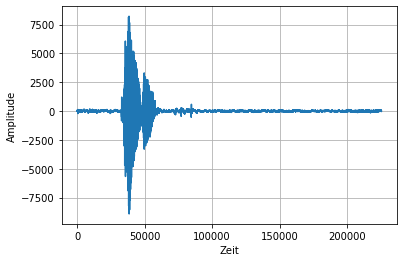

In [2]:
links = np.load("links.npy")
# Darstellung des Amplitudenspektrums
plt.plot(links)
plt.grid()
plt.xlabel('Zeit')
plt.ylabel('Amplitude')

(-1000.0, 22500.0)

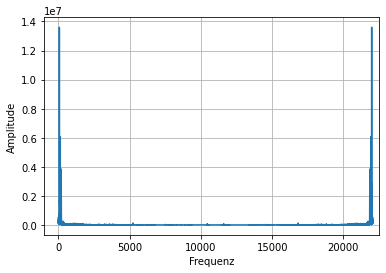

In [3]:
freq = np.zeros(44100)
difference = 2 / 44100
fourier = np.fft.fft(links[:44100])
# Die Fouriertransformierte Frequenz wird absolutiert, so dass kein negativer Wert mehr vorzufinden ist
spektrum = np.abs(fourier)
# Formel um die Anzahl der Schwingungen in die Freuquenz umzurechnen - f = n / (M * t)
for x in range(0, 44100, 1):
    freq[x] = (x / (difference * 44100))

# Darstellung des Amplitudenspektrums
plt.plot(freq, spektrum)
plt.grid()
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.xlim(-1000, 22500)

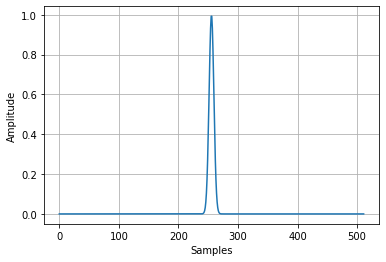

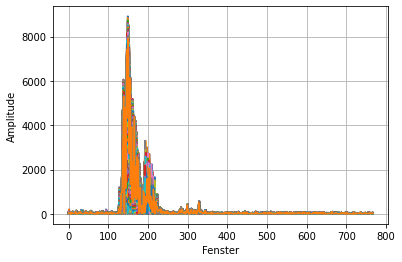

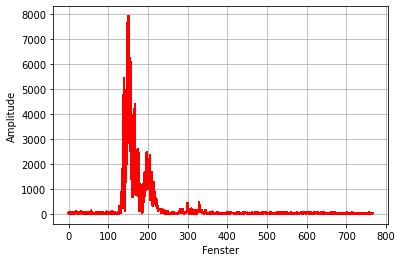

In [4]:
mitte = 256
samples = 512

fenster = np.zeros((mitte + samples, samples))
frequenz = np.zeros(44100)

gaussFenster = sig.windows.gaussian(samples, std = 4)       # GausFenster mit 4 standardabweichungen


testdaten = np.load("links.npy")


for y in range(0, 768):
    mitte = mitte - 256
    for x in range(0, samples):
        fenster[y,x] = np.mean(np.abs(np.fft.fft(testdaten[mitte] * gaussFenster)))
        mitte = mitte + 1

# Plot vom Gaussfenster
plt.grid(True)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(gaussFenster)
plt.show()

# Plot des Amplitudenspektrums des angewandten Fensters
plt.plot(fenster)
plt.grid(True)
plt.xlabel('Fenster')
plt.ylabel('Amplitude')
plt.show()

# Mittelung der fft()
for y in range (0, 768):
    for x in range(0, samples):
        fenster[y][x] = fenster[y][x] * gaussFenster[x]

    fenster[y] = np.abs(np.fft.fft(fenster[y]))
    fenster[y] = np.mean(fenster[y])

plt.plot(fenster, 'r')
plt.grid(True)
plt.xlabel('Fenster')
plt.ylabel('Amplitude')
plt.show()